## Simple trend 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('Guidelines_texts.csv', skipfooter=6)

date_list = []

for i in pd.to_datetime(df['Release_date']):
    try:
        date = datetime.datetime.strftime(i, '%m/%y') #format time to str
        date = datetime.datetime.strptime(date, '%m/%y') #parse str to time

        date_list.append(date)

    except ValueError: #deal with NAs 
        date = None
        date_list.append(date)

df['Release_date'] = date_list

df = df.sort_values(by = 'Release_date').reset_index()

df.head()

C:\Users\shrim\AppData\Local\Temp/ipykernel_3500/4275469853.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Guidelines_texts.csv', skipfooter=6)


,index,Continent,Country,Name,Type,Title,Text,Release_date,Link
0,19,North America,USA,AP,News agency,The future of augmented journalism: A guide fo...,NaN,2017-02-01,https://www.ap.org/assets/files/2017_ai_guide.pdf
1,5,Europe,United Kingdom,BBC,PBC,Scaling responsible machine learning at the BBC,The BBC's Values: The BBC's ML engines will re...,2019-01-01,https://www.bbc.co.uk/blogs/internet/entries/4...
2,11,Europe,Spain / Global,Prodigioso Volcán,Innovation company,AI for journalists: A tool to exploit,NaN,2020-01-01,https://www.prodigiosovolcan.com/sismogramas/i...
3,0,Europe,Germany,Bayerischer Rundfunk,PBC,Ethics of Artificial Intelligence: Our AI Ethi...,User Benefit We deploy AI to help us use the r...,2020-11-01,https://www.br.de/extra/ai-automation-lab-engl...
4,8,Europe,Austria,APA,Agency,Guideline for dealing with Artificial Intellig...,The Journalism Council has approved a new guid...,2022-01-01,https://apa.at/wp-content/uploads/2022/05/APA_...


Text(0.5, 0, 'Release Date')

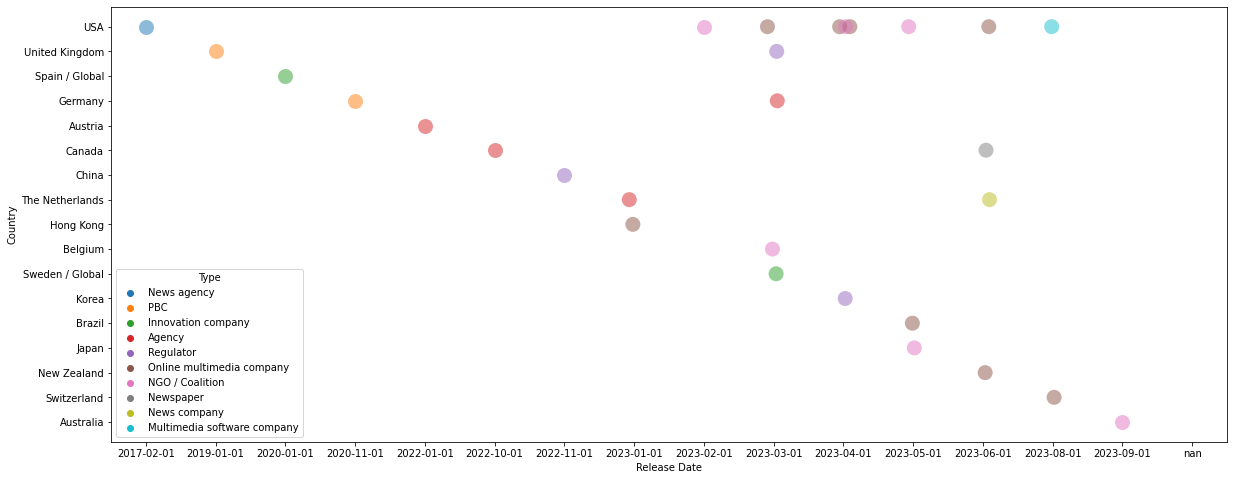

In [6]:
plt.figure(figsize=(20,8))
sns.stripplot(y=df['Country'], x = df['Release_date'].dropna().astype(str), hue = df['Type'],s = 15, alpha = 0.5)
plt.xlabel('Release Date')
